# <h1 align="center"><font color="red">Clusterização com K-Means</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

# <font color="pink">Importando nossas Bibliotecas e nossos Dados</font>

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
# Use essa flag caso esteja utilizando o jupyter notebook ou o console ipython
%matplotlib inline

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [2]:
df =pd. read_csv("./data/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

# <font color="yellow">Análise Univariada (`Univariate Analysis`)</font>

`Análise univariada` é uma técnica estatística que envolve a análise de uma `única variável` em um conjunto de dados por vez. Em outras palavras, ela se concentra na descrição e na compreensão das características de uma única variável, sem considerar as relações entre essa variável e outras variáveis no conjunto de dados.

As principais técnicas de `análise univariada` incluem:

* `Medidas de resumo estatístico`: Isso inclui calcular estatísticas descritivas, como média, mediana, moda, desvio padrão, mínimo, máximo e quartis, para resumir as propriedades da variável em estudo.

* `Histogramas e gráficos de frequência`: Histogramas são úteis para visualizar a distribuição dos valores da variável. Eles mostram a frequência com que diferentes intervalos de valores ocorrem na variável.

* `Gráficos de caixa (boxplots)`: Boxplots fornecem uma representação visual da distribuição dos dados, mostrando a mediana, quartis, valores mínimos e máximos e possíveis valores atípicos da variável.

* `Gráficos de barras e de setores`: Esses gráficos são usados principalmente para `variáveis categóricas` e mostram a distribuição das categorias e suas proporções.

* `Tabelas de frequência`: Tabelas de frequência são usadas para resumir a distribuição de valores de variáveis categóricas em um conjunto de dados.

A <font color="red">análise univariada</font> é frequentemente usada como ponto de partida na análise exploratória de dados (`EDA`), permitindo que os analistas tenham uma compreensão inicial das características e da distribuição dos dados em uma única variável. Essa análise também é útil para detectar valores discrepantes (`outliers`), entender a forma da distribuição dos dados e identificar possíveis padrões ou tendências.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


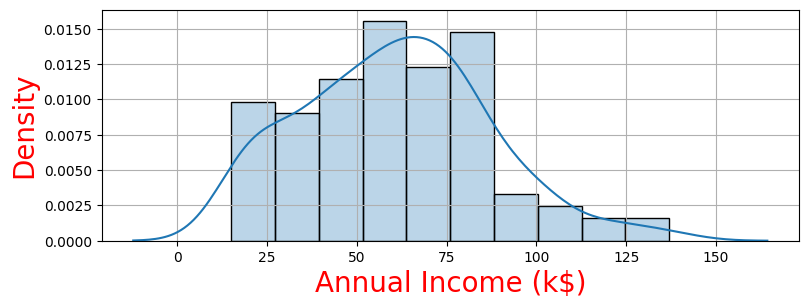

In [5]:

plt.figure(figsize=(9, 3))
sns.histplot(df['Annual Income (k$)'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=0.3)
plt.xlabel("Annual Income (k$)", color="red", fontsize=20)
plt.ylabel("Density", color="red", fontsize=20)
plt.grid(True)
plt.show()

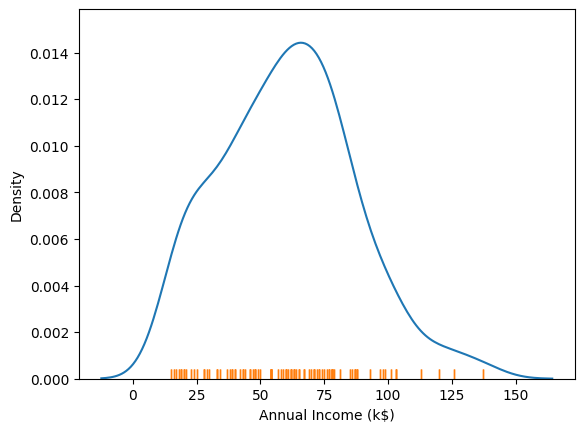

In [6]:
# Mostrando só a curva:
sns.kdeplot(df['Annual Income (k$)'])
sns.rugplot(df, x="Annual Income (k$)")
plt.show()

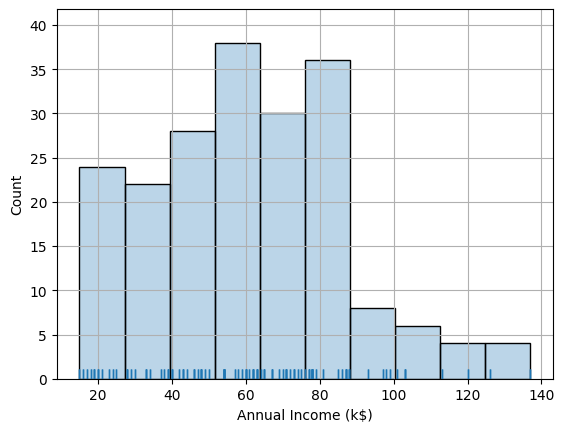

In [7]:
sns.histplot(df, x="Annual Income (k$)", alpha=0.3)
sns.rugplot(df, x="Annual Income (k$)")
plt.grid(True)
plt.show()


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

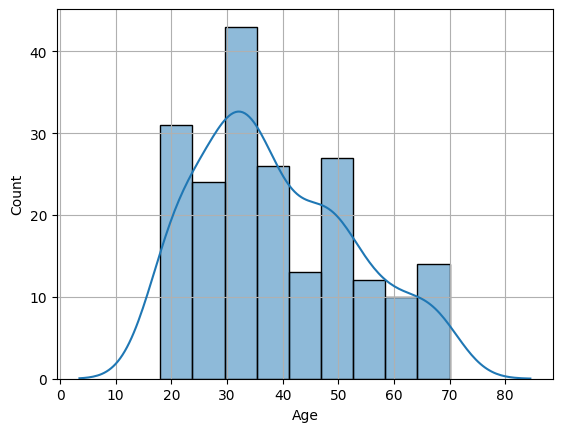

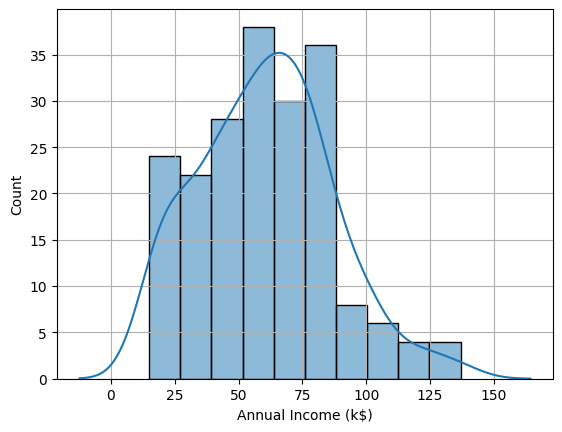

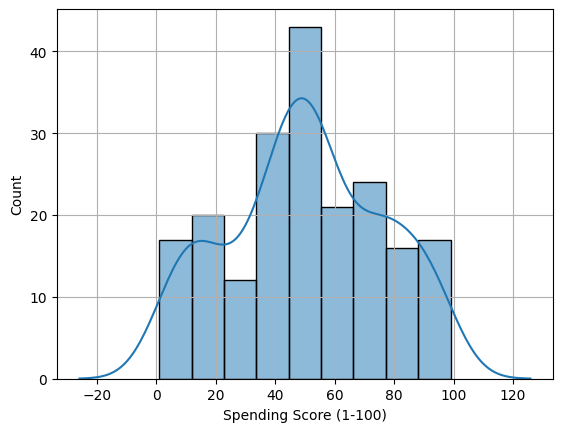

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    plt.grid(True)
    sns.histplot(df[i], kde=True, kde_kws=dict(cut=3))
    

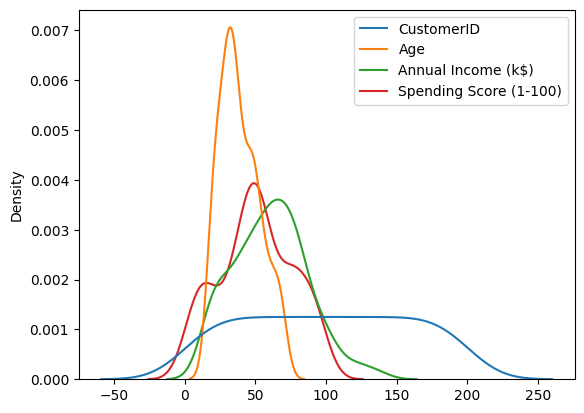

In [10]:
sns.kdeplot(data=df)
plt.show()

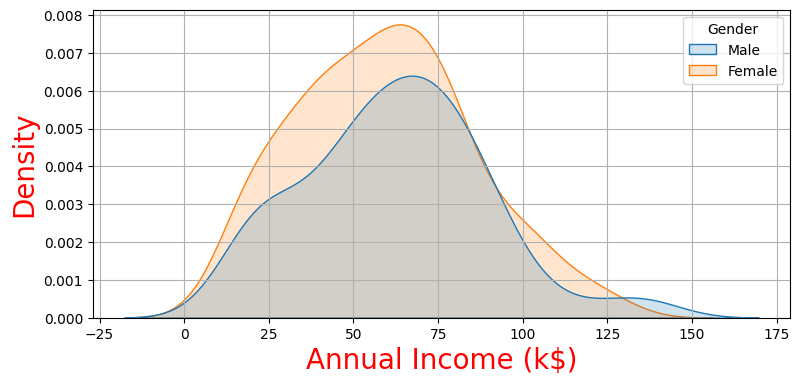

In [11]:
plt.figure(figsize=(9, 4))
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True, alpha=0.2)
plt.xlabel("Annual Income (k$)", color="red", fontsize=20)
plt.ylabel("Density", color="red", fontsize=20)
plt.grid(True)
plt.show()


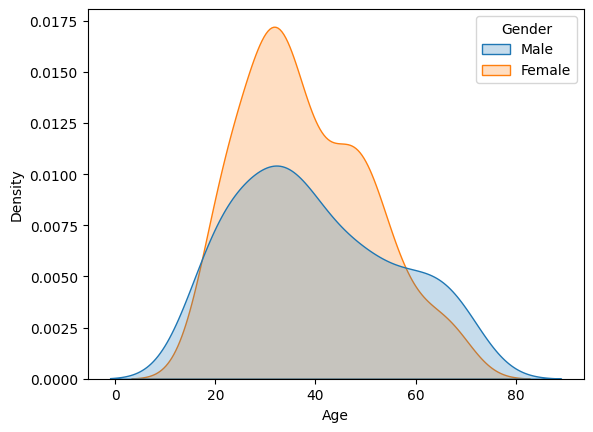

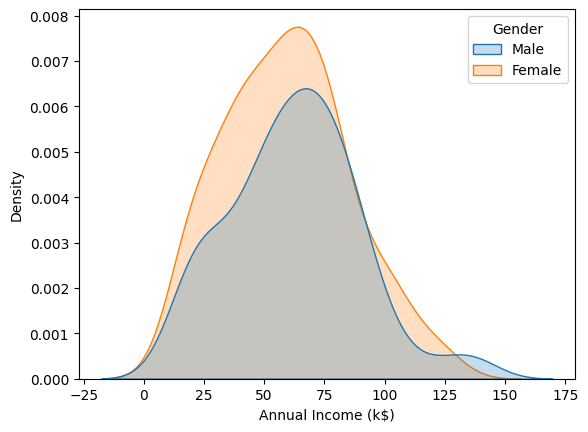

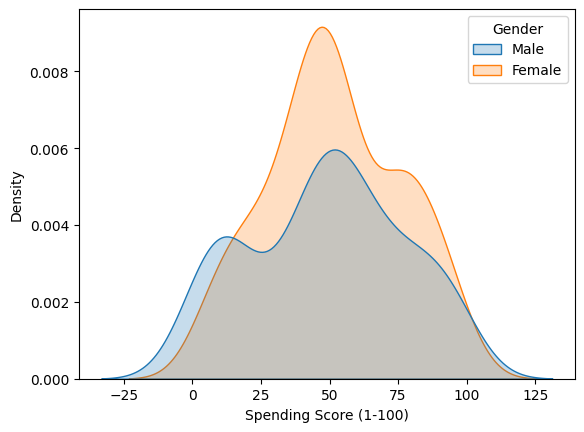

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue="Gender", fill=True)

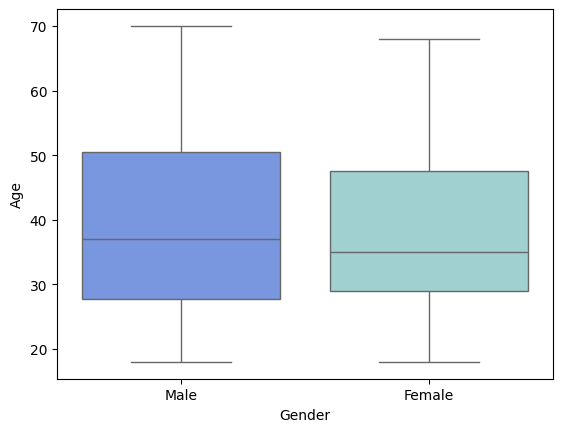

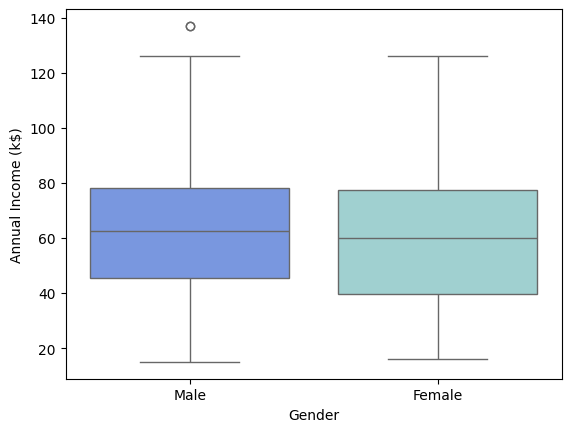

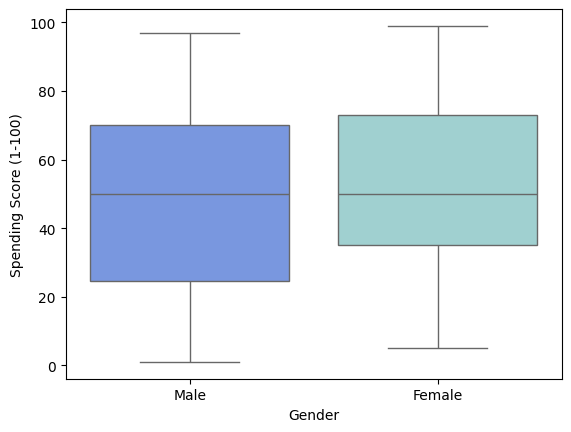

In [13]:
# Cores dos boxplot:
colors = ['#6890F0', '#98D8D8']

columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i], fill=True, palette=colors)


In [14]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [15]:
df["Gender"].value_counts(normalize=True) 

# 112/(112+88) = 0.56
# 88/(112+88) = 0.44
# Isso é útil para entender a distribuição dos dados em termos de proporções em vez de contagens absolutas.

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# <font color="yellow">Análise Bivariada (`Bivariate Analysis`)</font>

`Análise bivariada` é uma técnica estatística que envolve a análise simultânea de `duas variáveis` em um conjunto de dados, examinando a relação entre elas. Ao contrário da análise univariada, que se concentra em uma única variável por vez, a análise bivariada explora como duas variáveis estão relacionadas ou interagem entre si.

As principais técnicas de `análise bivariada` incluem:

* `Gráficos de dispersão`: Gráficos de dispersão são utilizados para visualizar a relação entre duas variáveis numéricas. Cada ponto no gráfico representa uma observação e sua posição no plano é determinada pelos valores das duas variáveis.

* `Coeficiente de correlação`: O coeficiente de correlação é uma medida estatística que quantifica o grau e a direção da relação linear entre duas variáveis numéricas. Ele varia de `-1 a 1`, onde `-1` indica uma correlação negativa perfeita, `0 indica ausência de correlação` e `1` indica uma correlação positiva perfeita.

* `Testes de hipóteses`: Diferentes testes estatísticos podem ser aplicados para avaliar se existe uma relação significativa entre duas variáveis. <font color="red">Por exemplo</font>, o `teste t de Student` pode ser usado para comparar as médias de duas amostras independentes, enquanto o `teste qui-quadrado` pode ser utilizado para avaliar a associação entre duas variáveis categóricas.

* `Análise de regressão`: A análise de regressão é uma técnica estatística que investiga a relação entre uma variável dependente e uma ou mais variáveis independentes. Ela permite modelar e prever o valor de uma variável com base nos valores de outras variáveis.

* `Tabelas de contingência`: Tabelas de contingência são usadas para resumir a relação entre duas variáveis categóricas, mostrando a distribuição conjunta das categorias e suas frequências.

A `análise bivariada` é útil para explorar relações entre variáveis, identificar padrões e associações, e entender melhor a estrutura dos dados. Ela pode fornecer insights importantes para a modelagem estatística e ajudar a orientar análises mais avançadas.


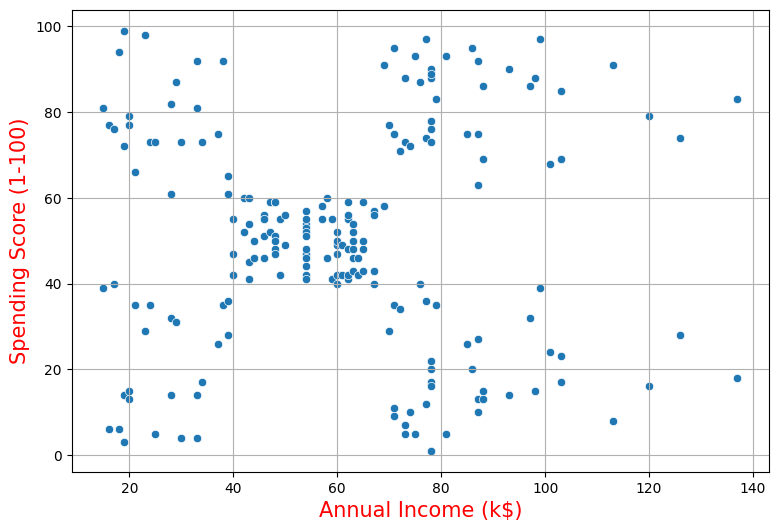

In [16]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )
plt.xlabel("Annual Income (k$)", color="red", fontsize=15)
plt.ylabel("Spending Score (1-100)", color="red", fontsize=15)
plt.grid(True)
plt.show()


<Figure size 600x600 with 0 Axes>

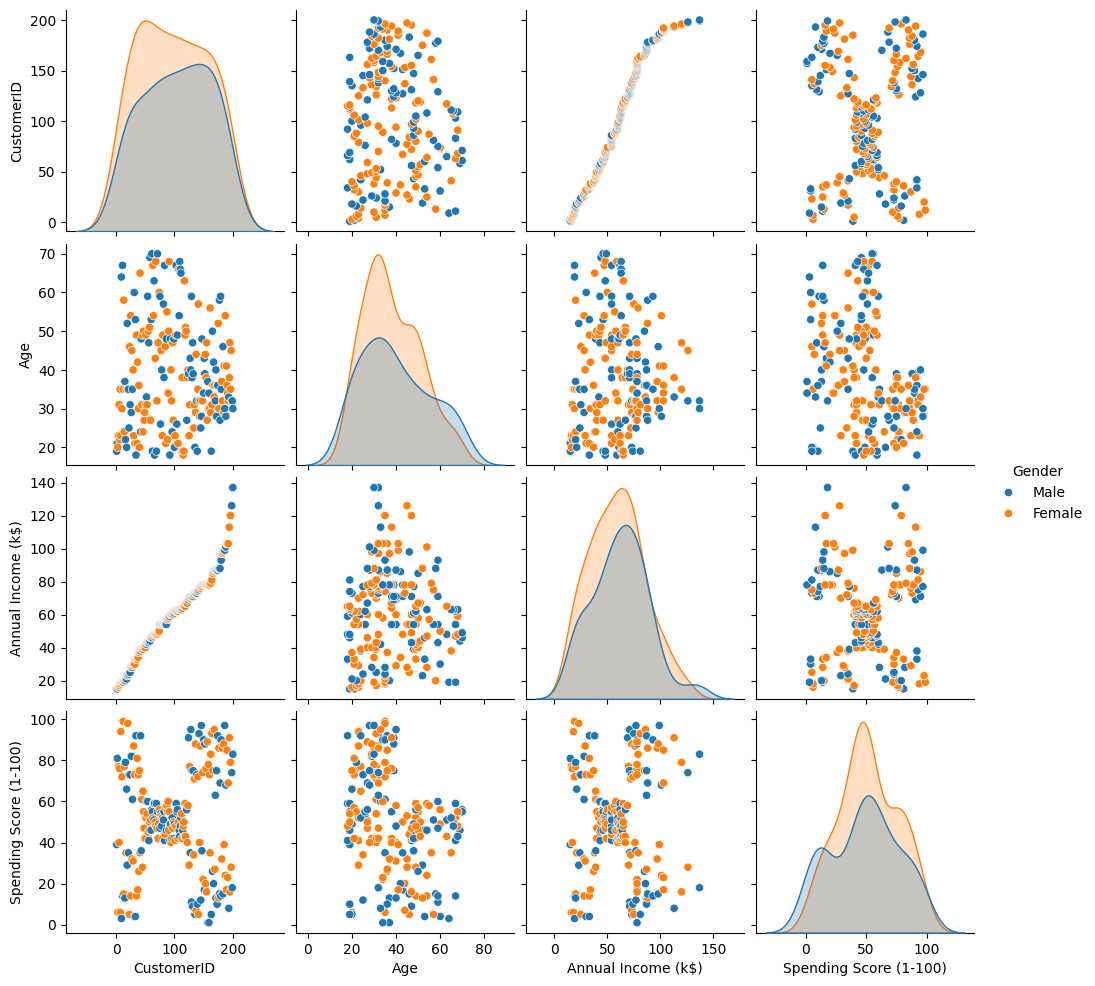

In [17]:
plt.figure(figsize=(6, 6))
sns.pairplot(df, hue='Gender')
plt.show()

In [18]:
# Aqui calculamos a Média de cada coluna para cada grupo de gênero:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
# Óbvio: calculamos a correlação apenas de colunas numéricas:
df.corr(method="pearson", numeric_only=True) # Documentação --> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [20]:
df.corr(method="spearman", numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.015249,0.999638,0.013149
Age,0.015249,1.000000,0.019767,-0.344940
Annual Income (k$),0.999638,0.019767,1.000000,0.007840
Spending Score (1-100),0.013149,-0.344940,0.007840,1.000000


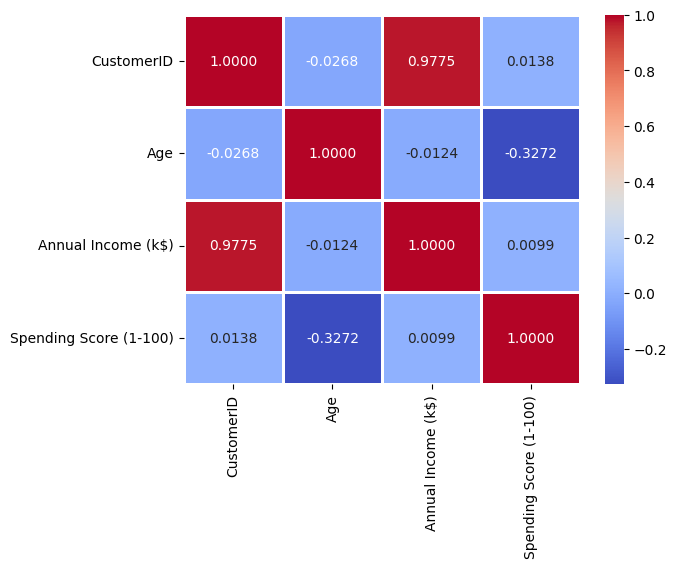

In [21]:
# Mapa de calor:
# Link da Documentação --> https://seaborn.pydata.org/generated/seaborn.heatmap.html

sns.heatmap(df.corr(method="pearson", numeric_only=True),
            annot=True, # Use 'annot' para representar os valores das células com texto.
            cmap="coolwarm",
            fmt="0.4f", # Controle as anotações com uma string de formatação.
            linewidths=0.9, # Adicione linhas entre as células.
           )
plt.show()

# <font color="yellow">Clustering - Univariado, Bivariado, Multivariado</font>

In [22]:
clustering1 = KMeans(n_clusters=3)

In [23]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [24]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [25]:
df['Income Cluster'] = clustering1.labels_

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [26]:
df['Income Cluster'].value_counts()

Income Cluster
1    86
2    58
0    56
Name: count, dtype: int64

In [27]:
clustering1.inertia_


25640.457784396833

In [28]:
intertia_scores=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    

In [29]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 25633.321484217206,
 14721.866979949875,
 9100.830157289776,
 5081.48466026727,
 3993.628787878788,
 2822.4996947496943,
 2455.365779645191,
 1992.362354312354]

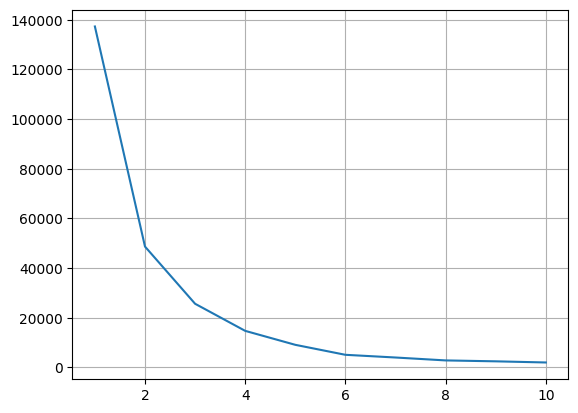

In [30]:
plt.plot(range(1, 11), intertia_scores)
plt.grid(True)
plt.show()

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [32]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


<font color="orange">Bivariate Clustering</font>

In [34]:
clustering2 = KMeans(n_clusters=5)

clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


In [35]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
1    81
2    39
4    35
3    23
0    22
Name: count, dtype: int64

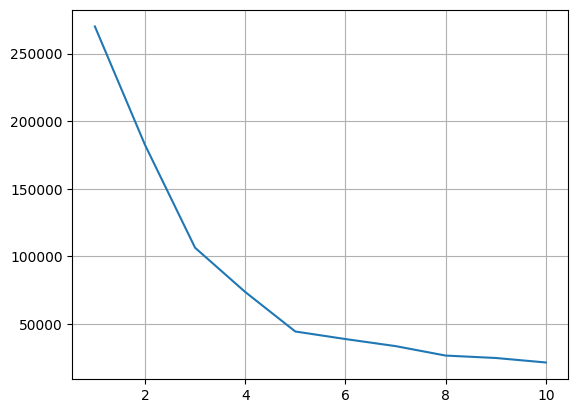

In [36]:
intertia_scores2=[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1, 11), intertia_scores2)
plt.grid()
plt.show()


In [37]:
centers =pd.DataFrame(clustering2.cluster_centers_)

centers.columns = ['x','y']


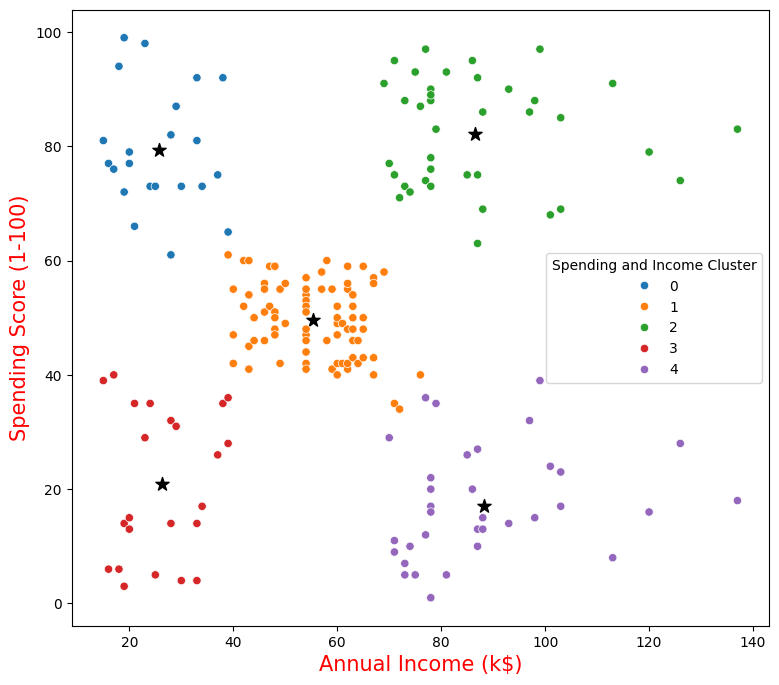

In [38]:
plt.figure(figsize=(9, 8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df,
                x ='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Spending and Income Cluster',
                palette='tab10'
               )
plt.xlabel("Annual Income (k$)", color="red", fontsize=15)
plt.ylabel("Spending Score (1-100)", color="red", fontsize=15)
plt.savefig('clustering_bivaraiate.png')
plt.show()


In [39]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.608696,0.391304
4,0.457143,0.542857


In [40]:
df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,41.114286,88.200000,17.114286


In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


<font color="orange">Mulivariate Clustering </font>

In [42]:
from sklearn.preprocessing import StandardScaler


scale = StandardScaler()


O método `StandardScaler` é uma técnica comum de pré-processamento de dados em aprendizado de máquina e é usado para padronizar as features (variáveis) de um conjunto de dados. Ele transforma os dados de forma que sua distribuição tenha uma `média zero` e um `desvio padrão unitário`.

`A padronização é importante em muitos algoritmos de aprendizado de máquina, especialmente aqueles que dependem de cálculos de distância, como Support Vector Machines (SVM), K-Means Clustering e Algoritmos de Regressão Linear.`

O `StandardScaler` realiza dois passos principais:

* `Subtração da média`: Para cada feature, o StandardScaler subtrai a média (`média aritmética`) do conjunto de dados. Isso centraliza os dados em torno de zero.

* `Escalonamento pela variância`: Em seguida, o StandardScaler divide cada feature pela sua variância (ou `desvio padrão`). Isso garante que a variância de cada feature seja igual a `1`.

Ao realizar esses dois passos, o `StandardScaler` transforma os dados para que eles tenham uma `média de zero` e um `desvio padrão de um`. Isso resulta em um conjunto de dados padronizado, no qual as features têm a mesma escala e estão centrados em torno de zero.

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


In [44]:

dff = pd.get_dummies(df, columns=["Gender"], drop_first=True)

dff.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,True
1,2,21,15,81,2,0,True
2,3,20,16,6,2,3,False
3,4,23,16,77,2,0,False
4,5,31,17,40,2,3,False


In [45]:
# Convertendo a coluna, "Gender_Male", para o tipo inteiro (0 ou 1):
dff['Gender_Male'] = dff['Gender_Male'].astype(int)

# Vejamos nosso resultado:
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,1
1,2,21,15,81,2,0,1
2,3,20,16,6,2,3,0
3,4,23,16,77,2,0,0
4,5,31,17,40,2,3,0


In [46]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [47]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [48]:
# Dados na mesma Escala:
dff = scale.fit_transform(dff)

In [49]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


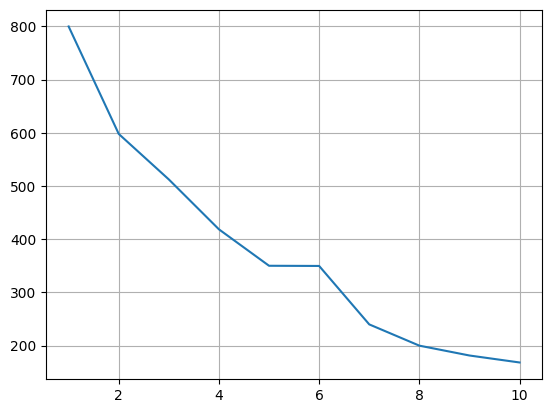

In [50]:
intertia_scores3=[]

for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1, 11), intertia_scores3)
plt.grid(True)
plt.show()


In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,3


In [ ]:
# df.to_csv('Clustering.csv')